<a href="https://colab.research.google.com/github/zuvelatamara/PPPO-2025/blob/main/PPPO_V2_Manipulacija_i_obrada_slika_pomocu_NumPy_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Manipulacija i obrada slika pomoću*  **NumPy** i **Pandas**



## Uvod:Šta su **NumPy**, **Pandas** i kako slika postaje niz?
Kada radimo sa digitalnim slikama u Pythonu, važno je da razumemo da su sve slike — zapravo numerički podaci.


>**NumPy** – osnova za rad sa slikama

**NumPy** je biblioteka namenjena brzom i efikasnom radu sa nizovima (matricama).

U kontekstu obrade slike, NumPy nam omogućava da sliku predstavimo kao trodimenzionalni niz oblika:

**(visina, širina, kanali)**


Kod klasičnih RGB slika, poslednja dimenzija ima tri kanala:

* R (Red) – crvena komponenta,

* G (Green) – zelena komponenta,

* B (Blue) – plava komponenta.

Dakle, svaki piksel slike možemo posmatrati kao trojku vrednosti (R, G, B).

Zahvaljujući NumPy-ju, možemo raditi nad slikom kao nad običnom matricom:

- menjati osvetljenost i kontrast,

- primenjivati filtere i transformacije,

- sabirati, oduzimati, rotirati ili skalirati slike .

>**Pandas** – analiza i prikaz podataka

**Pandas** je biblioteka koja služi za tabelarne podatke.Njena osnovna struktura je **DataFrame**.

U okviru DataFrame-a, svaka vrsta (red) može da predstavlja jednu sliku, dok su kolone pojedinačne karakteristike slike — npr.:

- R_mean, G_mean, B_mean – prosečne vrednosti kanala boja,

- gray_mean – prosečna osvetljenost grayscale slike,

- contrast – standardna devijacija intenziteta (izražava kontrast),

- bright_ratio – udeo piksela čija je vrednost iznad određenog praga (npr. > 0.7).

Takve tabele se mogu analizirati pomoću funkcija kao što su df.describe(), df.mean(), df.sort_values(),vizuelizovati i kombinovati sa drugim vrstama podataka (npr. metapodacima o slici, vremenu snimanja itd.).

Na ovaj način, svaka slika postaje numerički objekat koji možemo proučavati kvantitativno, a Pandas nam omogućava da te podatke efikasno grupišemo, filtriramo i analiziramo.

>Zašto „slika kao niz“?

Zato što ovaj pristup otvara mogućnost da nad slikama primenjujemo numeričke i statističke operacije isto kao nad običnim nizovima podataka.
Pomoću NumPy funkcija, kao što su:

- np.mean(), np.std() – za računanje proseka i odstupanja,

- np.min(), np.max() – za pronalaženje granica intenziteta,

- np.percentile() – za merenje raspodele svetlih i tamnih delova,

- np.clip() – za ograničavanje vrednosti piksela (npr. pri normalizaciji),

možemo da vršimo direktne proračune nad slikom bez potrebe za prolaskom kroz svaki piksel u petlji.
To se naziva vektorski rad, jer se operacije izvršavaju nad celim nizom odjednom, što Python uz pomoć NumPy-ja čini izuzetno brzim.

Kombinacijom NumPy + Pandas dobijamo moćan sistem za:

- pretvaranje slike u niz,

- izračunavanje karakteristika,

- i njihovu kasniju analizu, poređenje i vizualizaciju.

### Setup i biblioteke
Koristićemo:
- **NumPy** — matrice,
- **Pandas** — tabela sa karakteristikama,
- **Matplotlib** — vizuelizacije,
- **scikit-image** — praktične funkcije za rad sa slikama (učitavanje, grayscale, filteri, transformacije).

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.filters import gaussian, median, sobel
from skimage.morphology import disk
from skimage.transform import resize, rotate
import os, glob

## Učitavanje i prikaz — slika kao **NumPy** niz
**Cilj:** razumeti da je slika samo niz brojeva. Oblik (*shape*) nam kaže dimenzije, a `dtype` opseg vrednosti.



Kada sliku učitamo, možemo proveriti nekoliko važnih informacija:

- shape – dimenzije slike (visina, širina, broj kanala)

- dtype – opseg vrednosti (npr. uint8 ili float32)
  - Ako je `dtype=uint8`, vrednosti su **0–255**.
  - Ako je `dtype=float32/64`, obično normalizujemo u opsegu **[0,1]** radi stabilnog rada funkcija.

- opseg vrednosti – minimalna i maksimalna vrednost piksela

- prosek – prosečna vrednost svih piksela (osvetljenost slike)

Razumevanje ovih osnovnih karakteristika slike ključno je za sve naredne korake – od analize i filtriranja, do obuke neuronskih mreža i prepoznavanja oblika.

Oblik (H, W, C): (480, 690, 3) | dtype: uint8


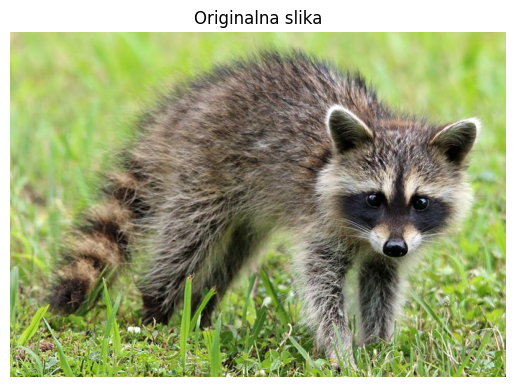

In [ ]:
# Napravimo folder za slike i obezbedimo bar jednu sliku
IMG_PATH = 'images/raccoon.jpg'
if not os.path.exists(IMG_PATH):
    demo = data.astronaut()  # primer RGB slike
    imsave(IMG_PATH, demo)

# Učitavanje slike kao NumPy niza
img = imread(IMG_PATH)
print('Oblik (H, W, C):', img.shape, '| dtype:', img.dtype)

# Prikaz slike (Matplotlib automatski očekuje RGB poredak)
plt.imshow(img)
plt.title('Originalna slika')
plt.axis('off')
plt.show()

In [ ]:
#Prikaz slike kao matrice (Zbog veličine slike prikazujemo prvih 5 redova i kolona)
print(img[:5, :5])

[[[215 208 156]
  [215 208 156]
  [213 208 153]
  [210 205 150]
  [208 203 147]]

 [[216 209 157]
  [216 209 157]
  [214 208 156]
  [211 206 151]
  [209 204 149]]

 [[218 210 161]
  [218 211 159]
  [216 210 158]
  [213 208 153]
  [210 205 150]]

 [[219 211 162]
  [219 211 162]
  [217 211 161]
  [215 209 157]
  [212 206 154]]

 [[220 212 165]
  [221 213 164]
  [219 213 163]
  [216 210 158]
  [213 207 155]]]


###Statistički prikaz matrice
- img.min() pokazuje koji je najmanji intenzitet boje u slici (obično blizu 0 za crnu).

- img.max() pokazuje najveći intenzitet (blizu 255 za bele ili vrlo svetle tonove).

- img.mean() daje prosečnu vrednost svih piksela, što može da se koristi kao jednostavna mera osvetljenosti slike — veća vrednost znači svetlija slika.

In [ ]:
#Statistički prikaz matrice
# Ispis minimalne vrednosti piksela u slici (najtamniji piksel)
print("Min:", img.min())

# Ispis maksimalne vrednosti piksela u slici (najsvetliji piksel)
print("Max:", img.max())

# Ispis prosečne vrednosti svih piksela u slici (srednja osvetljenost slike)
print("Prosek:", img.mean())


Min: 0
Max: 255
Prosek: 129.0919595410628


**Prosek po kanalima boje**

Svaka RGB slika se sastoji od tri kanala — R (crveni), G (zeleni) i B (plavi) — a svaki od njih nosi informaciju o količini određene boje u svakom pikselu.

- Pomoću funkcije np.mean() možemo izračunati prosečnu vrednost za svaki kanal posebno, što nam govori koja boja dominira u slici.
Na primer:

  - ako je prosečna vrednost crvenog kanala (R) veća od ostalih, slika ima topliji ton,

  - ako dominira plavi kanal (B), slika će izgledati hladnije.

- Pored toga, funkcija np.std() (standardna devijacija) pokazuje koliko su vrednosti raspršene u okviru svakog kanala.
Veća devijacija znači veći kontrast u toj boji — razlika između tamnih i svetlih delova slike je izraženija.

Ove mere nam omogućavaju da kvantitativno procenimo ton i kontrast slike, što je važno u analizi, segmentaciji i kasnijem radu s modelima.


In [ ]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

print('Proseci kanala  -> R:', R.mean(), '| G:', G.mean(), '| B:', B.mean())
print('Std dev. kanala -> R:', R.std(),  '| G:', G.std(),  '| B:', B.std())

Proseci kanala  -> R: 139.80987620772947 | G: 149.48230072463767 | B: 97.98370169082125
Std dev. kanala -> R: 47.63891278944176 | G: 56.34036788915572 | B: 41.67505357699389


## Normalizacija slike
Kada učitamo sliku, vrednosti piksela su obično tipa uint8, u opsegu od 0 do 255.
Za vizuelni prikaz to je u redu, ali kod obrade slike i treniranja modela ovakav raspon može izazvati numeričku nestabilnost — pogotovo u neuronskim mrežama ili prilikom izračunavanja statistika.

Zato se slika često normalizuje tako da vrednosti piksela budu u opsegu [0, 1].
To olakšava računanje, ubrzava rad modela i smanjuje greške zaokruživanja.

Kod normalizacije jednostavno delimo sve vrednosti sa 255 (maksimalnom vrednošću za 8-bitne slike).
Time slika prelazi iz tipa uint8 u float32 — vrednosti su manje, ali se odnosi među pikselima ne menjaju, pa vizuelno izgleda isto.

Vizuelno razlike neć biti, jer se samo matematički menja skala vrednosti — ali normalizacija je obavezna kod većine algoritama i modela koji očekuju podatke u kontrolisanom numeričkom opsegu.

Tip pre normalizacije: uint8
Opseg pre normalizacije: 0 do 255
----------------------------------------
Tip posle normalizacije: float32
Opseg posle normalizacije: 0.0 do 1.0


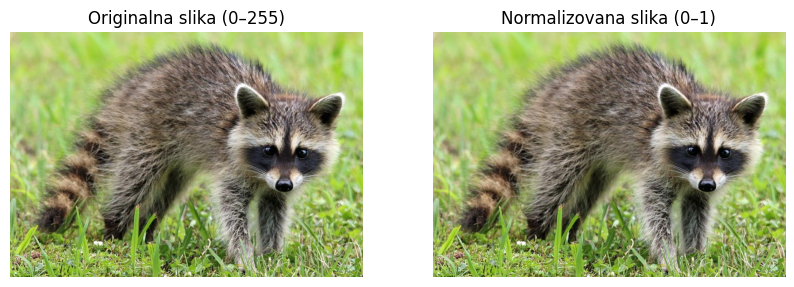

In [ ]:
# Provera trenutnog tipa i opsega vrednosti
print("Tip pre normalizacije:", img.dtype)
print("Opseg pre normalizacije:", img.min(), "do", img.max())
print("----------------------------------------")

# Konverzija u float i normalizacija u opseg [0,1]
img_norm = img.astype(np.float32) / 255.0

# Provera tipa i opsega posle normalizacije
print("Tip posle normalizacije:", img_norm.dtype)
print("Opseg posle normalizacije:", img_norm.min(), "do", img_norm.max())

# Vizuelni prikaz - slika izgleda isto jer se promenio samo numerički opseg
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Originalna slika (0–255)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_norm)
plt.title("Normalizovana slika (0–1)")
plt.axis("off")
plt.show()


## Grayscale prikaz i histogrami slike
**Grayscale** (crno-bela) verzija slike prikazuje samo osvetljenost piksela, bez informacija o boji.
Svaka tačka (piksel) ima vrednost između 0 (crno) i 1 (belo), što nam omogućava da analiziramo svetlinu i kontrast slike nezavisno od boje.

**Histogram osvetljenja** prikazuje raspodelu tih vrednosti — koliko ima tamnih, srednjih i svetlih tonova.
To je jednostavan način da „kvantitativno” vidimo kakva je ekspozicija slike:

- Ako je većina vrednosti levo → slika je tamna.

 - Ako su vrednosti desno → slika je svetla.

 - Ako je histogram ravnomeran → slika ima dobar kontrast.

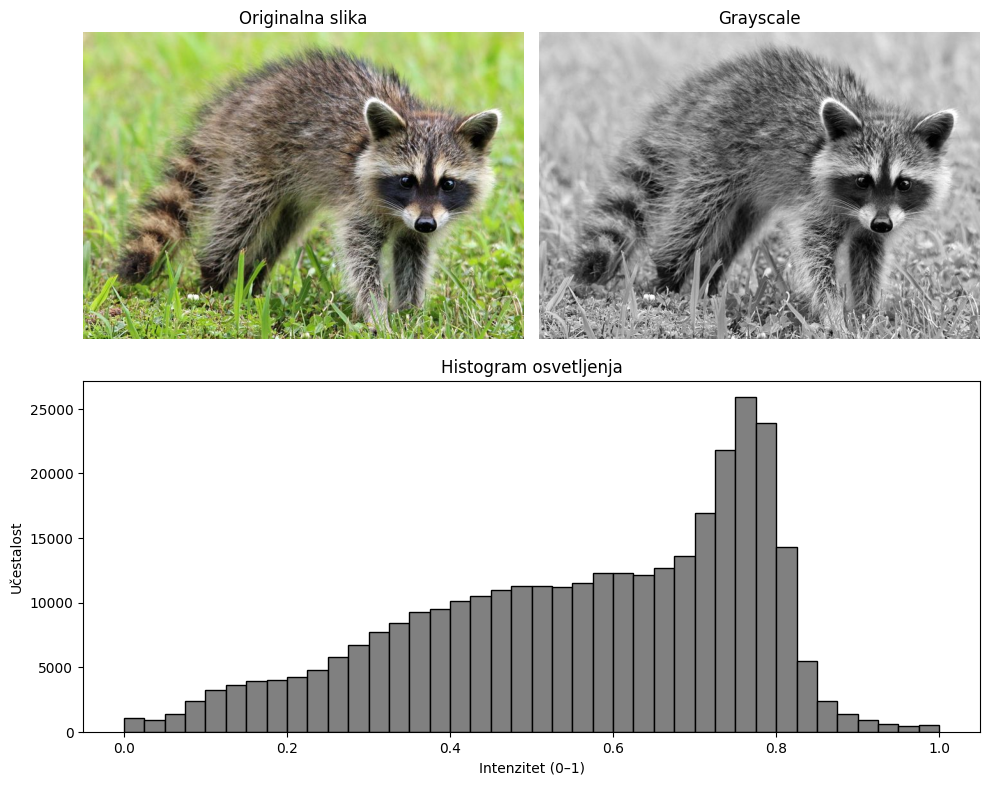

In [ ]:
gray = rgb2gray(img)  # opseg [0,1]

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Originalna slika')
plt.axis('off')


plt.subplot(2,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')


plt.subplot(2,1,2)
plt.hist(gray.ravel(), bins=40, color='gray', edgecolor='black')
plt.title('Histogram osvetljenja')
plt.xlabel('Intenzitet (0–1)')
plt.ylabel('Učestalost')
plt.tight_layout()
plt.show()



**Histogrami po RGB kanalima**

Histogrami po kanalima boje pomažu da vidimo balans boja na slici.
Na primer, ako je histogram crvenog kanala dominantan → slika ima topli ton,
ako dominira plavi kanal → hladniji ton,
dok slične raspodele znače da je slika koloristički uravnotežena.

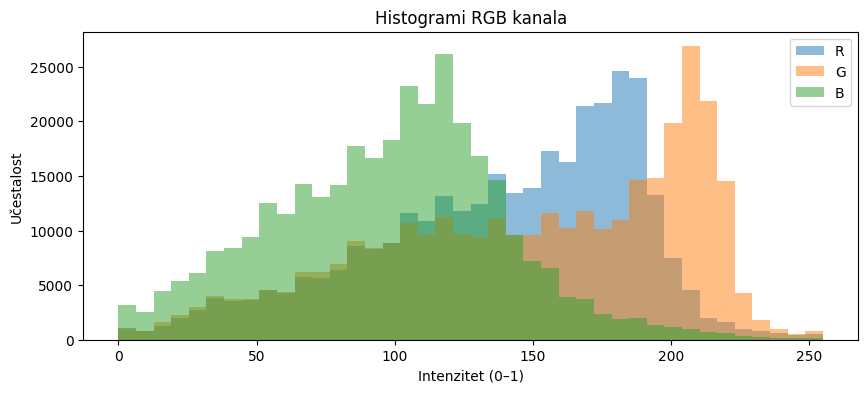

In [ ]:
# Histogrami RGB kanala (pomažu da vidimo ravnotežu boja)
plt.figure(figsize=(10,4))
plt.hist(R.ravel(), bins=40, alpha=0.5, label='R')
plt.hist(G.ravel(), bins=40, alpha=0.5, label='G')
plt.hist(B.ravel(), bins=40, alpha=0.5, label='B')
plt.title('Histogrami RGB kanala')
plt.xlabel('Intenzitet (0–1)')
plt.ylabel('Učestalost')
plt.legend()
plt.show()

## Prag (*threshold*) i binarna **maska**
U obradi slike često želimo da izdvojimo određene delove slike – na primer, svetle oblasti, objekte ili pozadinu.

Jedan od najjednostavnijih načina da to postignemo je postavljanje praga (**threshold-a**) — vrednosti kojom razdvajamo piksele u dve grupe:

- piksele iznad praga (svetliji),

- i piksele ispod praga (tamni).

Za grayscale sliku **gray** i prag **t**, binarna maska je logički niz iste veličine kao slika, gde:

- **True** (ili 1) znači da je uslov ispunjen (npr. gray > t),

- **False** (ili 0) znači da nije.

Maska je izuzetno korisna jer nam omogućava da:

  - brojimo piksele određene svetline,

  - vizuelno istaknemo oblasti,

- selektivno primenimo promene (npr. zamućivanje samo svetlih delova).

**Napomena:**
Ako želimo da naglasimo svetle delove, prag t treba da bude veći (npr. 0.7).
Ako želimo da istaknemo tamne delove, koristimo uslov gray < t.
Na taj način binarne maske postaju osnovni alat za segmentaciju i analizu strukture slike.

Udeo piksela iznad praga: 0.4987349033816425


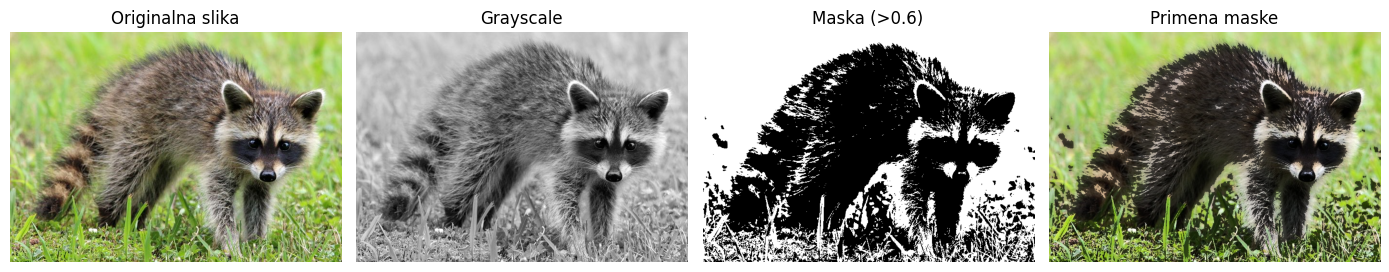

In [ ]:
thr = 0.6 # eksperimentišite sa 0.4, 0.5, 0.7
mask = (gray > thr) # eksperimentišite sa <, >
print('Udeo piksela iznad praga:', float(mask.mean()))

# Vizuelno isticanje: zatamnimo piksele koji nisu u maski
masked = img_norm.copy()
masked[~mask] *= 0.4 # eksperimentišite sa 0.2, 0.5, 0.7

plt.figure(figsize=(14,8))
plt.subplot(1,4,1); plt.imshow(img_norm); plt.title('Originalna slika'); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(mask, cmap='gray'); plt.title(f'Maska (>{thr})'); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(masked); plt.title('Primena maske'); plt.axis('off')
plt.tight_layout(); plt.show()

### Primena binarne maske – isticanje svetlih delova slike

Jednom kada kreiramo masku, možemo je iskoristiti da selektivno menjamo sliku.
Na primer, možemo obojiti sve piksele iznad određenog praga u neku boju (npr. crvenu), dok ostali ostaju nepromenjeni.
Ovo je osnova za segmentaciju, gde izdvajamo delove slike koji imaju slična svojstva.

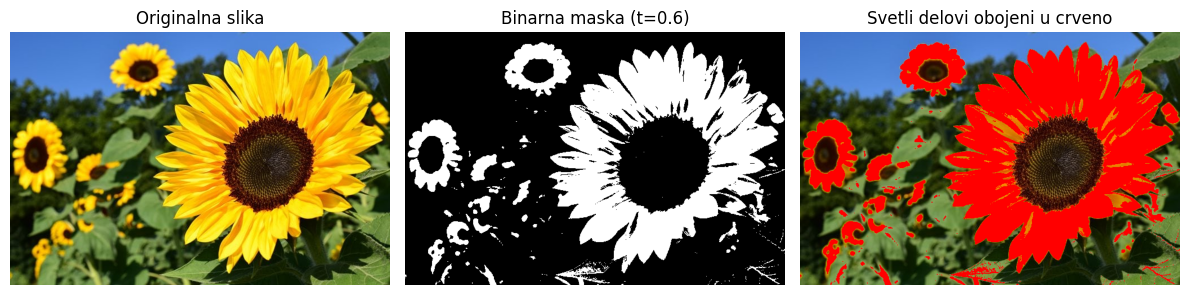

In [ ]:
img_t = imread('images/flowers.jpeg')
img_tst = img_t.astype(np.float32) / 255.0

# Pretvaranje slike u grayscale (ako već nije)
gray = rgb2gray(img_tst)

# Postavljanje praga (threshold)
t = 0.6
mask = gray > t  # pikseli iznad praga su True (svetli delovi)

# Kopiramo originalnu sliku da bi je mogli menjati
highlighted = img_tst.copy()

# Gde je maska True, postavljamo crvenu boju [1, 0, 0] (jer je slika normalizovana na [0,1])
highlighted[mask] = [1, 0, 0]

# Vizualizacija
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_tst)
plt.title("Originalna slika")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title(f"Binarna maska (t={t})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(highlighted)
plt.title("Svetli delovi obojeni u crveno")
plt.axis("off")

plt.tight_layout()
plt.show()


### Primena maske za segmentaciju slike



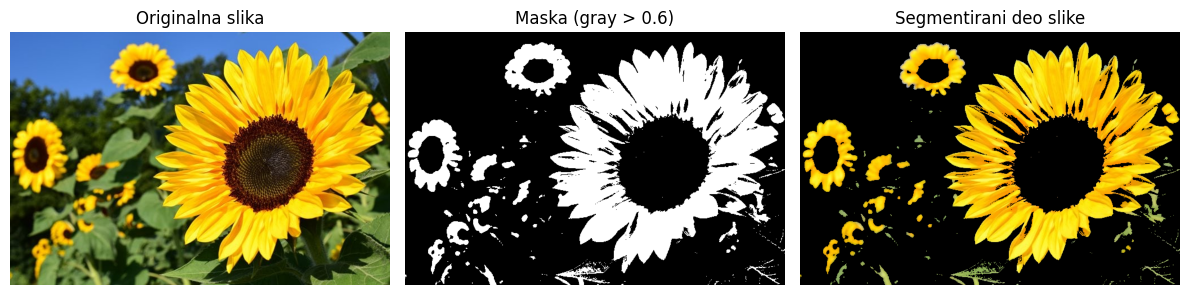

In [ ]:
# Pretvaramo masku u 3 kanala da bismo je mogli primeniti na RGB sliku
mask_3ch = np.dstack([mask]*3)

# Množenje slike sa maskom – pikseli gde je maska False postaju crni
segmented = img_tst * mask_3ch

# Prikaz rezultata
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_tst)
plt.title("Originalna slika")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Maska (gray > 0.6)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(segmented)
plt.title("Segmentirani deo slike")
plt.axis("off")
plt.tight_layout()
plt.show()


## Geometrijske transformacije — *crop, resize, rotacija, flip*

Geometrijske transformacije su temelj svake obrade slike, jer se koriste u svim fazama — od pripreme podataka i augmentacije, do modelovanja i testiranja neuronskih mreža.

Ove transformacije menjaju koordinate piksela:

- **Crop** uzima samo deo slike koji nas zanima.

- **Resize** prilagođava veličinu slike — često je potreban da bi sve slike u datasetu imale iste dimenzije (npr. 224×224 za CNN).

- **Rotate** koristi matricu transformacije da svaki piksel pomeri u nov položaj, uz eventualno ispunjavanje pozadine.

- **Flip** menja orijentaciju slike i koristi se za povećanje raznovrsnosti trening skupa (augmentaciju).

Ove operacije ne menjaju sadržaj slike, ali značajno utiču na način na koji će algoritam “videti” oblik i orijentaciju objekata.

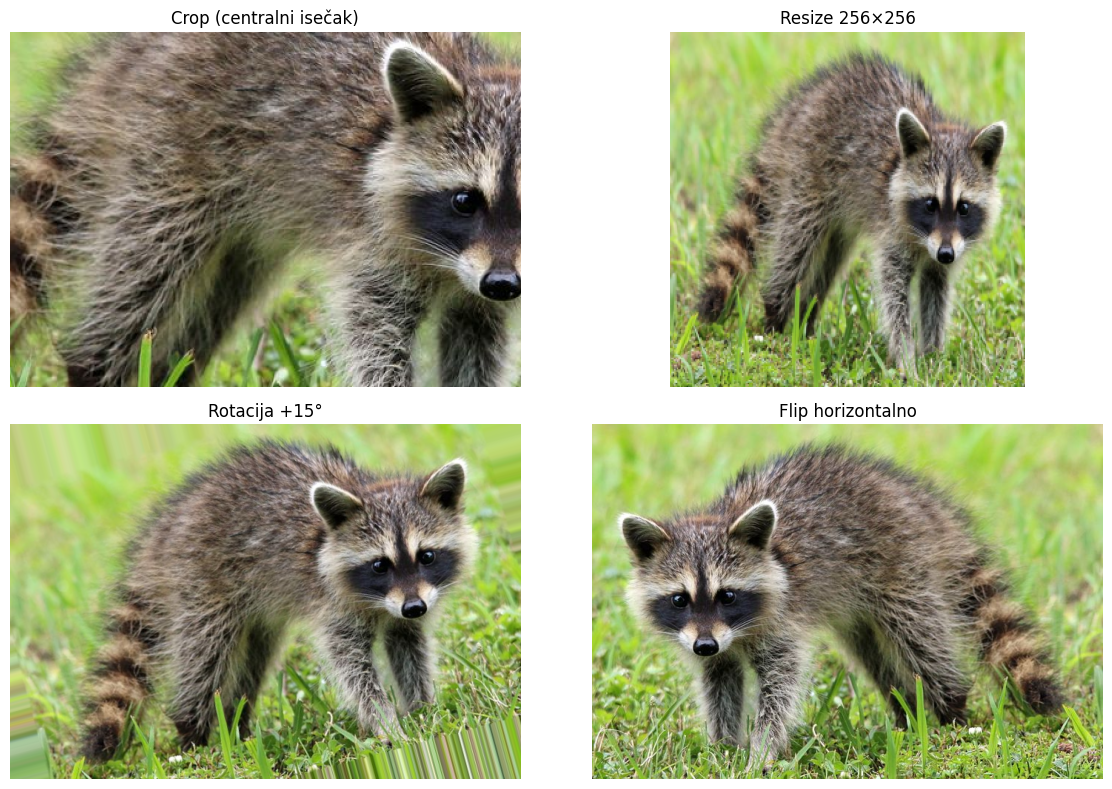

In [ ]:
# Dobijamo visinu (h) i širinu (w) slike
h, w = img_norm.shape[:2]

# Crop – pravimo centralni isečak slike (60% originalne veličine)
# Računamo visinu i širinu isečka (60% od originala)
ch, cw = int(0.6 * h), int(0.6 * w)

# Određujemo gornji levi ugao isečka tako da crop bude centriran
y0, x0 = (h - ch) // 2, (w - cw) // 2

# Pravimo isečak pomoću NumPy slicing notacije [redovi, kolone]
crop = img_norm[y0:y0 + ch, x0:x0 + cw]

# Resize – menjamo dimenzije slike na 256×256 piksela
# anti_aliasing=True daje glađe rezultate prilikom smanjenja slike
resz = resize(img_norm, (256, 256), anti_aliasing=True)

# Rotacija – rotiramo sliku za +15 stepeni (pozitivno = udesno)
# mode='edge' popunjava ivice rotirane slike najbližim pikselima
rot = rotate(img_norm, angle=15, mode='edge')

# Flip – horizontalno preslikavanje slike (levo ↔ desno)
# axis=1 znači da preslikavamo po širini slike
flip_h = np.flip(img_norm, axis=1)

# Prikaz rezultata – svaka transformacija zauzima jedan subplot
plt.figure(figsize=(12,8))

plt.subplot(2,2,1); plt.imshow(crop); plt.title('Crop (centralni isečak)'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(resz); plt.title('Resize 256×256'); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(rot); plt.title('Rotacija +15°'); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(flip_h); plt.title('Flip horizontalno'); plt.axis('off')

plt.tight_layout(); plt.show()


U ovom primeru smo geometrijske transformacije slike — crop, resize, rotaciju i flip — izveli uz pomoć biblioteke **NumPy** i funkcija iz scikit-image paketa.
Ovaj pristup je jednostavan i pregledan jer prikazuje kako se slike mogu posmatrati i menjati kao nizovi brojeva (matrice).

U praksi, iste transformacije se često rade pomoću biblioteka kao što su **OpenCV** (npr. cv2.resize, cv2.warpAffine, cv2.flip) ili čak u okviru  modernih AI okvira koji interne transformacije koriste za obradu i generisanje slika.

Važno je razumeti da su principi identični — bez obzira da li radimo u NumPy-u, OpenCV-u ili u AI alatima, svaka transformacija se svodi na matematičke operacije nad pikselima.

## Filteri — *Gaussian* i *Median*
Filtriranje slike je jedan od osnovnih koraka u obradi slike, jer omogućava da se ukloni šum, naglase ivice ili pripremi slika za dalju analizu.

**Gaussian filter** koristi matematičku funkciju (Gaussovo jezgro) za zamućivanje slike, čime se smanjuje sitni šum i omekšavaju prelazi između tonova.

Nasuprot njemu, **Median filter** ne koristi proseke, već svaku vrednost piksela zamenjuje srednjom vrednošću iz lokalnog okruženja, zbog čega je veoma efikasan kod impulsnog šuma (“so i biber”).

Gaussian filter je dobar za opšte zamućenje slike, dok Median filter bolje čuva ivice i konture objekata. Izbor između njih zavisi od tipa šuma i željenog efekta.

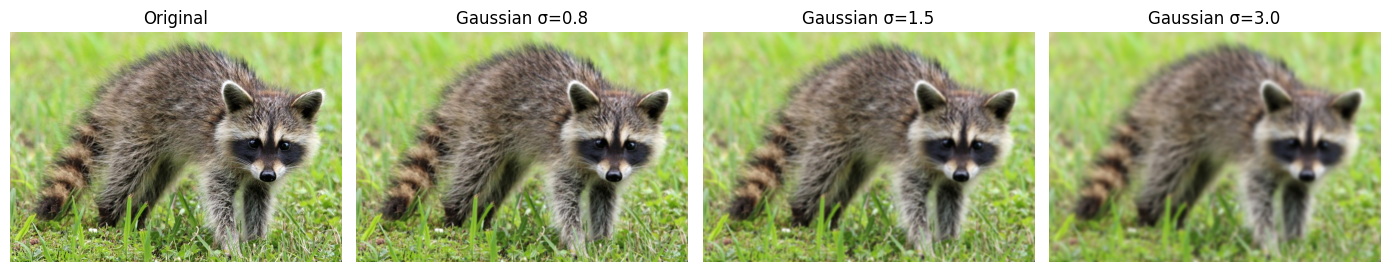

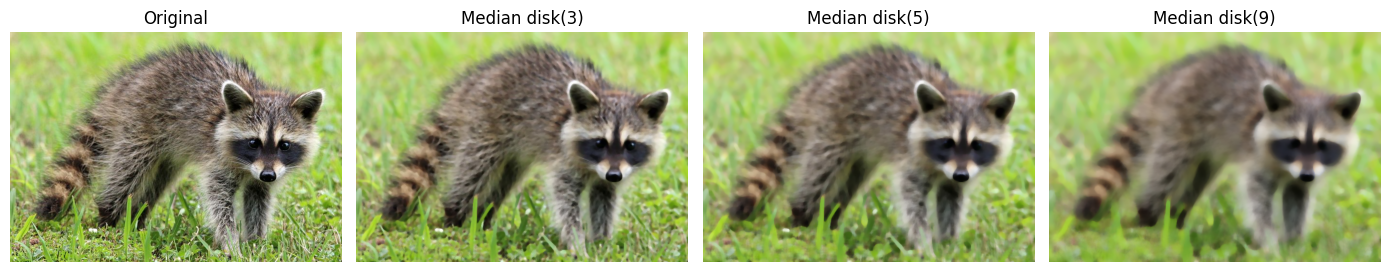

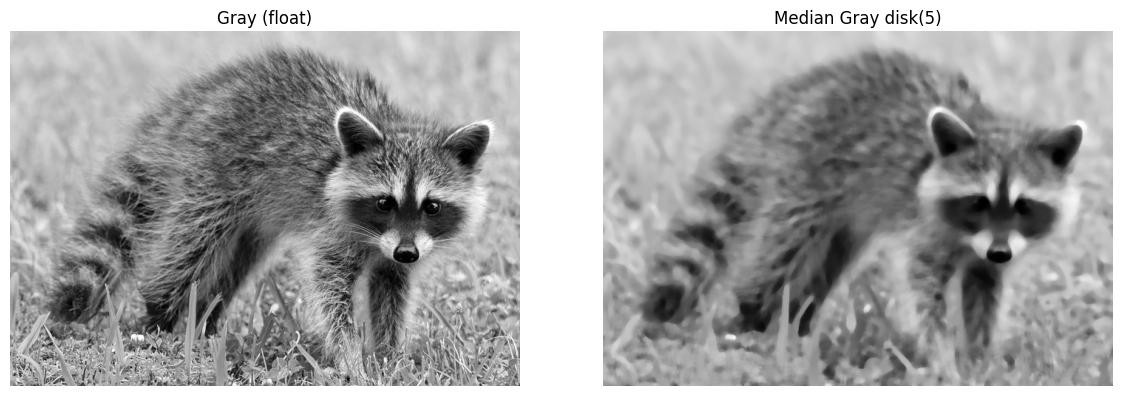

In [ ]:
#  img_norm je float slika u [0,1], shape (H, W, 3)

# Gaussian blur – zamućivanje pomoću Gaussovog jezgra
# sigma kontroliše stepen zamućenja (veći sigma = jače zamućenje)
sigmas = [0.8, 1.5, 3.0]  # probajte da promenite listu (npr. dodajte 5.0)
gauss_imgs = [gaussian(img_norm, sigma=s, channel_axis=2) for s in sigmas]

fig, axs = plt.subplots(1, len(sigmas) + 1, figsize=(14, 4))
axs[0].imshow(img_norm); axs[0].set_title("Original"); axs[0].axis("off")
for i, (s, gimg) in enumerate(zip(sigmas, gauss_imgs), start=1):
    axs[i].imshow(gimg); axs[i].set_title(f"Gaussian σ={s}"); axs[i].axis("off")
plt.tight_layout(); plt.show()

# Objašnjenje:
# sigma = standardna devijacija Gaussovog jezgra u pikselima.
# Manji sigma zamućuje blago, veći sigma briše detalje i "poteže" boje.


# Median filter – uklanja impulsni šum ("so i biber")

# Median filter nad RGB – radi po kanal (median očekuje 2D ulaz)
# Svaki kanal pretvaramo u uint8 i filtriramo zasebno.
radii = [3, 5, 9]  # disk radijusi (veći prozor = jače uklanjanje impulsnog šuma)
imgs_median = []
for r in radii:
    med_r = median((img_norm[..., 0] * 255).astype(np.uint8), footprint=disk(r))
    med_g = median((img_norm[..., 1] * 255).astype(np.uint8), footprint=disk(r))
    med_b = median((img_norm[..., 2] * 255).astype(np.uint8), footprint=disk(r))
    med_rgb = np.stack([med_r, med_g, med_b], axis=2).astype(np.float32) / 255.0
    imgs_median.append(med_rgb)

fig, axs = plt.subplots(1, len(radii) + 1, figsize=(14, 4))
axs[0].imshow(img_norm); axs[0].set_title("Original"); axs[0].axis("off")
for i, (r, mimg) in enumerate(zip(radii, imgs_median), start=1):
    axs[i].imshow(mimg); axs[i].set_title(f"Median disk({r})"); axs[i].axis("off")
plt.tight_layout(); plt.show()

# Objašnjenje:
# disk(r) pravi kružni prozor radijusa r piksela; r=9 - veliki prozor = agresivnije zaglađivanje.
# Median je robustan na "so-i-biber" šum i bolje čuva ivice nego Gaussian.


# Median filter nad GRAYSCALE slikom
gray = rgb2gray(img_norm)                    # float [0,1], shape (H, W)

r = 5  # promenite na 3, 7, 9 da vidite razliku
gray_med = median((gray * 255).astype(np.uint8), footprint=disk(r))

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(gray, cmap="gray");     axs[0].set_title("Gray (float)"); axs[0].axis("off")
axs[1].imshow(gray_med, cmap="gray"); axs[1].set_title(f"Median Gray disk({r})"); axs[1].axis("off")
plt.tight_layout(); plt.show()



Gaussian i Median filteri imaju različitu primenu i efekte.

Gaussian filter pravi glatke prelaze i efikasno uklanja sitan, ravnomeran šum, ali može da „izbriše“ ivice i detalje slike.

Median filter, s druge strane, zadržava ivice i oblike jer se zasniva na median vrednostima u lokalnom prozoru, pa bolje uklanja impulsni šum (“so i biber”).

U praksi se često kombinuju: Gaussian za blago zamućenje, a Median kada je cilj čišćenje slike bez gubitka ivica.

## Detekcija ivica pomoću Sobel filtera



Detekcija ivica (Edge Detection) je jedan od osnovnih zadataka u obradi slike.
Cilj je da pronađemo mesta gde se intenzitet slike naglo menja — to su obično granice objekata.
Sobel filter koristi dve male 3×3 matrice (tzv. jezgra) koje izračunavaju:

- horizontalne promene (Sobel X)

- vertikalne promene (Sobel Y)

Kombinovanjem ova dva pravca dobijamo ukupnu jačinu ivice, tj. „koliko se piksel razlikuje od suseda“.
Ova tehnika se koristi kao osnova za segmentaciju, prepoznavanje kontura, objekata i ivica u računarskoj viziji.

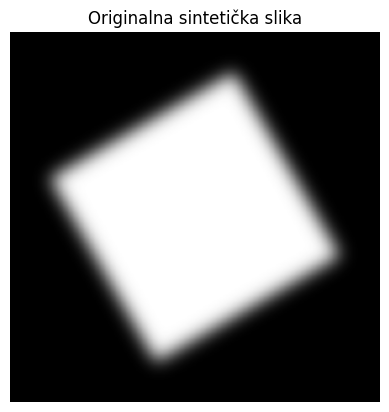

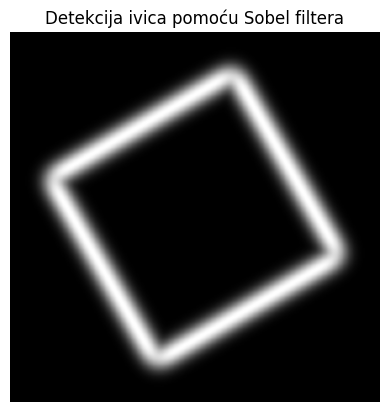

In [ ]:
# Kreiramo jednostavnu sintetičku sliku (beli kvadrat na crnoj pozadini)
im = np.zeros((300, 300))
im[64:-64, 64:-64] = 1

# Rotiramo sliku i dodajemo Gaussian blur (da ivice budu mekše)
im = rotate(im, 30, mode='constant')
im = gaussian(im, sigma=7)

# Prikaz originalne slike
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title("Originalna sintetička slika")
plt.show()

# Primena Sobel filtera za horizontalni i vertikalni pravac
dx = sobel(im, axis=0, mode='constant')  # promene po visini (Y)
dy = sobel(im, axis=1, mode='constant')  # promene po širini (X)

# Kombinujemo rezultate (Pitagorina formula)
sobel_edges = np.hypot(dx, dy)

# Prikaz detektovanih ivica
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.title("Detekcija ivica pomoću Sobel filtera")
plt.show()


**Objašnjenje**

 - Sintetička slika – napravili smo crno-beli kvadrat, pa ga rotirali i zamutili Gaussian filterom da simuliramo realne ivice.

 - Sobel filter – detektuje prelaze u osvetljenju tako što meri promene duž x i y ose.

 - Rezultat (sobel_edges) – pokazuje mesta gde se intenzitet najbrže menja → to su ivice.

 - Primena – koristi se za segmentaciju, konture, prepoznavanje oblika i detekciju objekata.

# Analiza slike pomoću Pandas DataFrame

Pandas možemo iskoristiti da sliku posmatramo kao tabelu podataka.
Svaki piksel tada predstavlja jedan red, a njegove osobine (R, G, B, grayscale, maska…) — kolone.
Na taj način možemo raditi isto ono što radimo sa bilo kojim datasetom:
računati proseke, filtrirati po uslovima, grupisati po klasama, ili crtati histogram distribucija.

Ovakav pristup je posebno koristan kada želimo da kvantitativno analiziramo rezultate segmentacije.
Na primer, možemo uporediti prosečne vrednosti osvetljenosti unutar i van maske,
ili analizirati koji kanal (R, G, B) najviše doprinosi razlikama u segmentu.

Pandas nam, dakle, omogućava da pređemo iz nivoa “vizuelne obrade slike”
u nivo “statističke interpretacije slike” — što je upravo temelj istraživačkog pristupa u analizi podataka i prepoznavanju oblika.

In [ ]:
import pandas as pd  # Uvoz biblioteke Pandas – koristi se za rad sa tabelarnim podacima

# Pretvaranje slike u DataFrame
H, W, C = img_tst.shape
# H = visina slike (broj redova piksela)
# W = širina slike (broj kolona piksela)
# C = broj kanala (za RGB slike obično 3)

# Formiramo rečnik gde je svaki ključ ime kolone, a vrednost je 1D niz piksela iz slike
# .ravel() "ispravlja" 2D matricu u jednodimenzionalni niz (vektor)
data = {
    'R': img_tst[..., 0].ravel(),   # vrednosti crvenog kanala
    'G': img_tst[..., 1].ravel(),   # vrednosti zelenog kanala
    'B': img_tst[..., 2].ravel(),   # vrednosti plavog kanala
    'Gray': gray.ravel(),           # osvetljenost piksela u grayscale formatu
    'Mask': mask.ravel()            # logička vrednost (True/False) da li je piksel u segmentu
}

# Kreiramo Pandas DataFrame – tabelu u kojoj je svaki red jedan piksel,
# a svaka kolona jedna karakteristika (R, G, B, osvetljenost, pripadnost maski)
df = pd.DataFrame(data)

# Prikazujemo prvih 5 redova tabele
df.head()


R         G         B      Gray   Mask
0  0.25098  0.447059  0.788235  0.429991  False
1  0.25098  0.447059  0.788235  0.429991  False
2  0.25098  0.447059  0.788235  0.429991  False
3  0.25098  0.447059  0.788235  0.429991  False
4  0.25098  0.447059  0.788235  0.429991  False

**Zašto svi redovi u prvih par prikaza izgledaju isto?**

To je normalno jer df.head() prikazuje samo prvih 5 redova (piksela), a oni često potiču iz istog dela slike (npr. gornji levi ugao) gde su boje slične ili identične.

Uzimamo drugih 5 piksela kako bi videli razlike:

In [ ]:
df.sample(5)

R         G         B      Gray   Mask
203977  1.000000  0.823529  0.058824  0.805894   True
30283   0.368627  0.490196  0.611765  0.473128  False
7385    0.419608  0.521569  0.333333  0.486330  False
28890   0.341176  0.545098  0.870588  0.525233  False
66292   0.341176  0.556863  0.882353  0.534497  False

Funkcija df.describe() u Pandas-u se koristi da brzo prikaže osnovne statistike o numeričkim kolonama u DataFrame-u.

| Statistika          | Značenje                                            |
| ------------------- | --------------------------------------------------- |
| **count**           | broj vrednosti (piksela) u koloni                   |
| **mean**            | aritmetička sredina                                 |
| **std**             | standardna devijacija (raspon varijacije vrednosti) |
| **min**             | najmanja vrednost                                   |
| **25% / 50% / 75%** | kvartili (pokazuju kako su vrednosti raspoređene)   |
| **max**             | najveća vrednost                                    |


In [ ]:
df.describe()

R              G              B           Gray
count  303750.000000  303750.000000  303750.000000  303750.000000
mean        0.491355       0.471815       0.191193       0.455734
std         0.346415       0.267507       0.263236       0.261658
min         0.000000       0.000000       0.000000       0.006667
25%         0.196078       0.203922       0.015686       0.188964
50%         0.364706       0.509804       0.070588       0.487438
75%         0.929412       0.670588       0.254902       0.676322
max         1.000000       1.000000       0.941176       0.958719

##  **Pandas**: tabela karakteristika za više slika
Kada imamo kolekciju slika (dataset), korisno je iz svake slike izvući osnovne karakteristike i prikazati ih u jednoj tabeli.

Tako dobijamo pregled podataka koji se lako može analizirati, filtrirati ili vizualizovati.

U ovom primeru, iz svake slike računamo prosečne i standardne vrednosti po kanalima (R, G, B), prosečnu osvetljenost (grayscale), i udeo svetlih piksela (npr. onih čija je osvetljenost veća od 0.7).

Ova analiza nam pomaže da procenimo razlike između slika — na primer, koje su svetlije, koje imaju jače kontraste ili dominaciju određene boje.

In [ ]:
# Pronalazimo sve slike u folderu "images" (jpg i png)
paths = sorted(glob.glob('images/*.jpg') + glob.glob('images/*.png'))
print('Nađeno slika:', len(paths))

rows = []  # lista u kojoj ćemo čuvati rezultate za svaku sliku

for p in paths:
    # Učitavanje slike
    I = imread(p).astype(np.float32)   # čitamo sliku i pretvaramo u float

    # Normalizacija – ako su vrednosti 0–255, pretvori ih u opseg [0,1]
    if I.max() > 1.0:
        I /= 255.0

    # Ako je grayscale (nema 3 kanala), proširi je u pseudo-RGB
    if I.ndim == 2:
        I = np.stack([I, I, I], axis=2)

    # Izdvajamo R, G, B kanale
    R_i, G_i, B_i = I[:,:,0], I[:,:,1], I[:,:,2]

    # Računamo grayscale verziju slike (osvetljenost)
    gray_i = rgb2gray(I)

    # Dodajemo izračunate vrednosti u listu kao rečnik
    rows.append({
        'fajl': os.path.basename(p),         # ime fajla slike
        'visina': I.shape[0],                # visina u pikselima
        'sirina': I.shape[1],                # širina u pikselima
        'R_mean': R_i.mean(), 'G_mean': G_i.mean(), 'B_mean': B_i.mean(),  # prosečne vrednosti kanala
        'R_std':  R_i.std(),  'G_std':  G_i.std(),  'B_std':  B_i.std(),   # standardne devijacije
        'gray_mean': gray_i.mean(),          # prosečna osvetljenost slike
        'bright_ratio_0.7': float((gray_i > 0.7).mean())  # procenat svetlih piksela (>0.7)
    })

# Formiramo DataFrame – tabela sa karakteristikama svih slika
df = pd.DataFrame(rows)
df

Nađeno slika: 3


fajl  visina  sirina    R_mean    G_mean    B_mean     R_std  \
0      cat.jpg     650     950  0.449716  0.449716  0.449716  0.275846   
1  example.jpg     453     770  0.556685  0.459618  0.377676  0.257071   
2  raccoon.jpg     480     690  0.548274  0.586205  0.384250  0.186819   

      G_std     B_std  gray_mean  bright_ratio_0.7  
0  0.275846  0.275846   0.449716          0.259987  
1  0.246468  0.249073   0.474337          0.225257  
2  0.220943  0.163432   0.563584          0.345604

- R_mean, G_mean, B_mean pokazuju koje boje dominiraju u slici.
- R_std, G_std, B_std mere kontrast po kanalima — veće vrednosti znače više šarenila.
- gray_mean je prosečna osvetljenost slike.
- bright_ratio_0.7 označava procenat svetlih piksela (iznad praga 0.7).

### Vizualizacija rezultata — analiza osvetljenosti slika

Nakon što smo sve slike pretvorili u tabelarni oblik pomoću Pandas DataFrame-a, možemo njihove karakteristike i grafički prikazati.

- Svaka traka (bar) predstavlja jednu sliku.
- Visina trake pokazuje prosečnu osvetljenost slike (gray_mean).
- Slike sa većim stubićima su svetlije, dok niže označavaju tamnije fotografije.

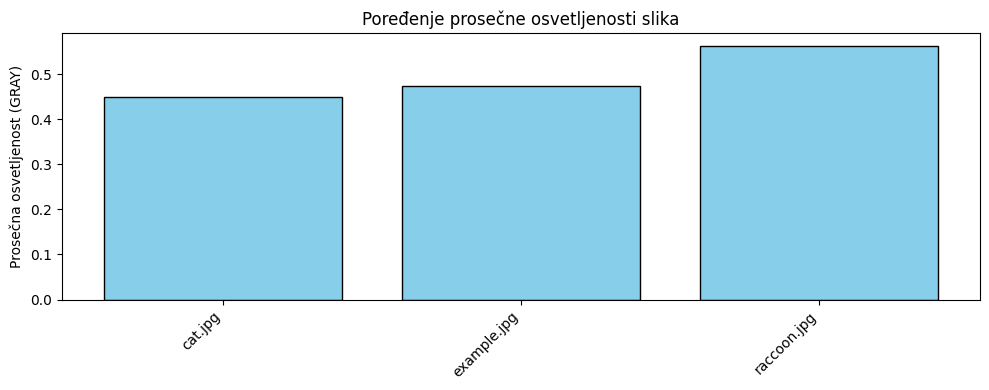

In [ ]:
if len(paths) > 0:
    plt.figure(figsize=(10,4))

    # Bar grafikon gde je svaka traka jedna slika
    plt.bar(df['fajl'], df['gray_mean'], color='skyblue', edgecolor='black')

    # Oznake osa i naslova
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Prosečna osvetljenost (GRAY)')
    plt.title('Poređenje prosečne osvetljenosti slika')

    # Automatsko podešavanje margina
    plt.tight_layout(); plt.show()

Ovim pristupom svaku sliku u kolekciji pretvaramo u numerički opis, koji se lako analizira pomoću Pandas-a.
Umesto da slike posmatramo vizuelno, sada ih možemo kvantitativno upoređivati po svetlini, kontrastu i tonalitetu.

Ovakva tabela se često koristi kao ulaz za modele klasifikacije, klasterizacije ili detekcije anomalija, jer omogućava da slike tretiramo kao standardne redove u datasetu.

Kombinovanjem NumPy, Pandas i Matplotlib biblioteka dobijamo moćan alat za analitičku obradu slika — od numeričke analize do vizuelnog prikaza rezultata.
Ovaj pristup je korak ka ozbiljnijim zadacima u istraživačkim projektima, gde se slike tretiraju kao podaci koji se mogu kvantitativno analizirati, grupisati i modelovati.

## Dodatni primer — percentili i pomoćna funkcija za normalizaciju
U obradi slike često želimo da pojačamo kontrast ili da sve slike svedemo na sličan nivo osvetljenosti.

Umesto da koristimo ekstremne vrednosti (min i max), možemo koristiti procentile koji daju otporniju procenu "tamnog" i "svetlog" dela slike.

Na primer, 10. percentil (p10) označava nivo ispod kog se nalazi 10% najsvetlijih piksela, dok 90. percentil (p90) označava nivo ispod kog se nalazi 90% piksela.

Ova tehnika ignoriše ekstremno tamne ili svetle piksele koji mogu narušiti kontrast.

10. percentil: 0.2662411630153656 | 90. percentil: 0.7920044839382172


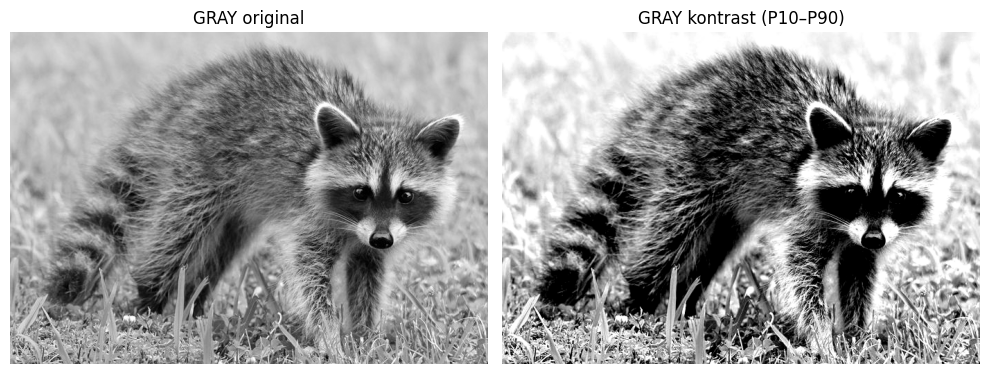

In [ ]:
def normalize(arr):
    #Pomoćna funkcija za normalizaciju slike u opseg [0,1]
    a_min, a_max = arr.min(), arr.max()
    if a_max - a_min < 1e-9:        # izbegavamo deljenje nulom
        return np.zeros_like(arr)
    return (arr - a_min) / (a_max - a_min)


# Izračunavamo 10. i 90. percentil osvetljenosti
p10, p90 = np.percentile(gray, [10, 90])
print('10. percentil:', p10, '| 90. percentil:', p90)

# Normalizacija kontrasta u odnosu na [p10, p90]
gray_clip = np.clip((gray - p10) / max(1e-9, (p90 - p10)), 0, 1)

# Prikaz originalne i pojačane (kontrastne) slike
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('GRAY original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_clip, cmap='gray')
plt.title('GRAY kontrast (P10–P90)')
plt.axis('off')

plt.tight_layout()
plt.show()


## Mini-zadaci
1. **Zadatak 1 – Učitavanje i analiza slike**
- Učitaj proizvoljnu sliku iz svog računara (ili koristi neku iz images/ foldera).
- Prikaži sliku i njene dimenzije (shape) i tip podataka (dtype).
- Izračunaj prosečne vrednosti R, G i B kanala.
- Prikaži histogram osvetljenja (koristi rgb2gray i plt.hist).


2. **Zadatak 2 – Normalizacija i grayscale prikaz**

- Pretvori sliku u float32 i normalizuj vrednosti na opseg [0,1].
- Kreiraj grayscale verziju slike pomoću rgb2gray.
- Prikaži originalnu i grayscale sliku jednu pored druge.

3. **Zadatak 3 – Binarna maska i segmentacija**
- Napravi prag (t) po osvetljenju grayscale slike (npr. t = 0.6).
- Napravi binarnu masku (mask = gray > t).
- Prikaži masku kao crno-belu sliku.
- Primenom maske izdvoji svetle delove slike i prikaži rezultat

4. **Zadatak 4 – Geometrijske transformacije**
- Napravi centralni crop od 60 % originalne slike.
- Uradi rotaciju za +30° i horizontalni flip.
- Prikaži rezultate

5. **Zadatak 5 – Filtri i detekcija ivica**
- Na odabranu sliku primeni Gaussian filter (npr. sigma=2).
- Na istoj slici primeni Median filter (disk(3) ili disk(5)).
- Zatim detektuj ivice pomoću Sobel filtera (sobel(gray)).
- Prikaži sve slike zajedno (original, Gaussian, Median, Sobel).

6. **Zadatak 6 – Analiza jedne slike pomoću Pandas-a**
- Učitaj proizvoljnu sliku i konvertuj je u float32 opseg [0,1].
- Pretvori sliku u DataFrame gde će svaka kolona predstavljati kanal:
  - R, G, B, i Gray (koristi rgb2gray).
- Dodaj kolonu Mask koja ima vrednost 1 za piksele iznad zadatog praga osvetljenja (npr. gray > 0.6) i 0 inače.
- Prikaži prvih 5 redova DataFrame-a (df.head()) i opiši koje informacije sadrži.
- Prikaži osnovne statistike pomoću df.describe().
- Nacrtaj histogram za svaki kanal (R, G, B, Gray).

In [ ]:
# Radni prostor za mini zadatke
# Zad.1:

# Zad.2:

# Zad.3:

# Zad.4:

# Zad.5:

# Zad.6:
